# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [39]:
import os
import requests 
import tweepy
import pandas as pd 
from dotenv import load_dotenv


# load the .env file variables
load_dotenv()

#consumer_key = os.env.get("CONSUMER_KEY")
#consumer_secret = os.env.get("CONSUMER_SECRET")
#bearer_token= os.env.get("BEARER_TOKEN")

consumer_key = "o9CK6vHNHHQ84AVdEJniVejrK"
consumer_secret = "NcZEbK1XqyCnhVVEnqiUHTo2VGliqsFETYdr5LeqnYNLEnjUaa"
bearer_token ="AAAAAAAAAAAAAAAAAAAAAAyGdwEAAAAAyaYS%2BncXUUsAL%2BuFPG3IYlTYmbk%3D9e5lNkfChphvs0AMhVEvPw2I6ppG9xXOM6KAf8WaNqAgNuDpen"

# Creando cliente de Twitter

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

# Definiendo el query para Tweeter

query = '#100daysofcode (pandas OR python) -is:retweet'  
#query = '#datamagement (pandas OR python) -is:retweet'    

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [40]:
tweets

<Response [200]>

In [41]:
tweets_dict = tweets.json() 

In [42]:
list(tweets_dict)

['data', 'meta']

In [43]:
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data)
df

,author_id,id,created_at,lang,text
0,1478018301225684993,1541877334877564928,2022-06-28T20:12:57.000Z,en,Buy Tripadvisor Reviews\nhttps://t.co/epOPwEKE...
1,1528856711725031425,1541877074180333575,2022-06-28T20:11:55.000Z,en,Python Programming Language: Data Wrangling Wi...
2,1031948945541554176,1541877061538684929,2022-06-28T20:11:52.000Z,en,#Python | Day 28\n\nBulk E-mail.\n\n@ecxunilag...
3,1243665419501744133,1541876694449004544,2022-06-28T20:10:25.000Z,en,"""Superstars think like superstars long before ..."
4,1489379341591003141,1541876692876201986,2022-06-28T20:10:24.000Z,en,"This Summer, let's handle your:-\n#Assignments..."
...,...,...,...,...,...
95,1528856711725031425,1541860797688815618,2022-06-28T19:07:15.000Z,en,https://t.co/6rrb8p8FMb\n#pythonprogramming #p...
96,1501931950055075840,1541859574185091074,2022-06-28T19:02:23.000Z,en,Day 5/ #100DaysOfCode \n\nCreated a tic tac t...
97,227530614,1541859357645848579,2022-06-28T19:01:31.000Z,es,Software de alquiler de motos en PHP y #MySQL\...
98,243568454,1541859277295521793,2022-06-28T19:01:12.000Z,en,#Google’s ‘sentient #AI child’ could ‘escape a...


In [44]:
tweets_data

[{'author_id': '1478018301225684993',
  'id': '1541877334877564928',
  'created_at': '2022-06-28T20:12:57.000Z',
  'lang': 'en',
  'text': 'Buy Tripadvisor Reviews\nhttps://t.co/epOPwEKEb0\n#buytripadvisorreviews #tripadvisorreviews #writerslift #WritersCommunity #readingcommunity\n#readingforpleasure #author #KindleUnlimited #TwitchDoBetter #100DaysOfCode\n#javascript #webdevelopment #html #CSS3 #WomenWhoCode #Python #D https://t.co/evTd9aHjTB'},
 {'author_id': '1528856711725031425',
  'id': '1541877074180333575',
  'created_at': '2022-06-28T20:11:55.000Z',
  'lang': 'en',
  'text': 'Python Programming Language: Data Wrangling With Numpy, Ipython, Pandas,\n\nhttps://t.co/qFoTb2bqhp \n\n#programming #python #python3 #numpy #100daysofcode #programminglanguages #pythonprogramming'},
 {'author_id': '1031948945541554176',
  'id': '1541877061538684929',
  'created_at': '2022-06-28T20:11:52.000Z',
  'lang': 'en',
  'text': '#Python | Day 28\n\nBulk E-mail.\n\n@ecxunilag \n\nMy solution to th

In [45]:
list(tweets_data[0])

['author_id', 'id', 'created_at', 'lang', 'text']

In [46]:
# Guardar el df en un archivo tipo csv
df.to_csv('../assets/coding-tweets.csv')



In [47]:
# la libreria re corresponde a las expresiones regulares en python
#import re
import re

# crear la funcion para contar los tweets que contienen las palabras pandas y python
# Aca definimos la funcion

def palabra_en_tweet(pal,twt):
    ret = 0
    pal = pal.lower()
    twt= twt.lower()
    esta = re.search(pal,twt)
    if esta:
        ret=1
    return ret
             



In [48]:
# Inicializamos unas listas para contar las palabras encontradas en los  tweets
# iterrows sirve para iterar sobre filas en pandas

[pan, pyt] = [0 , 0]

# Vamos a iterar el en dataframe para saber si las palabras buscadas estan en los tweets que leimos

for indice,fila in df.iterrows():
    pan += palabra_en_tweet('pandas', fila['text'])
    pyt += palabra_en_tweet('python', fila['text'])

print(pan)
print(pyt)    

2
100


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


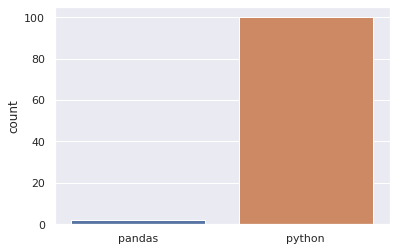

In [50]:
# Visualizar los datos
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

# Lista de las eqiquetas para colocar
cab = ['pandas','python']

varx = sns.barplot(cab,[pan,pyt])
varx.set(ylabel='count')
plt.show()

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()